In [1]:
# for mapper
import kmapper as km
from kmapper.jupyter import display
# for lens function
import sklearn
import sklearn.manifold as manifold
# for calculations and plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [50]:
data = pd.read_excel(r'NBAPlayers8283.xlsx')

In [51]:
df=pd.DataFrame(data)
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,Player-additional
0,1,Kareem Abdul-Jabbar*,C,35,LAL,79,79,2554,13.1,22.2,...,10.7,3.6,1.1,3.1,3.6,4.0,31.2,118,104,abdulka01
1,2,Alvan Adams,C,28,PHO,80,75,2447,9.2,18.9,...,10.6,7.3,2.2,1.4,4.7,5.5,21.9,102,98,adamsal01
2,3,Mark Aguirre,SF,23,DAL,81,75,2784,12.9,26.7,...,8.5,5.6,1.3,0.4,4.4,4.1,33.2,108,110,aguirma01
3,4,Danny Ainge,SG,23,BOS,80,76,2048,8.0,16.2,...,4.8,5.7,2.5,0.1,2.2,5.8,17.8,110,104,aingeda01
4,5,Dwight Anderson,PG,22,DEN,5,0,33,9.1,18.2,...,2.6,3.9,1.3,0.0,6.5,9.1,27.3,96,112,anderdw01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,312,Al Wood,SF,24,SDC,76,47,1822,8.8,18.9,...,6.0,3.4,1.4,0.9,2.8,4.8,21.1,105,111,woodal01
312,313,Mike Woodson,SG,24,KCK,81,3,2426,10.8,21.4,...,4.6,4.7,2.5,1.1,3.2,3.8,27.4,112,105,woodsmi01
313,314,Orlando Woolridge,SF,23,CHI,57,38,1627,10.0,17.3,...,8.3,2.7,1.1,1.2,4.4,4.9,26.1,110,109,woolror01
314,315,James Worthy*,SF,21,LAL,77,1,1970,10.5,18.1,...,9.4,3.1,2.1,1.5,4.2,5.2,24.2,109,105,worthja01


In [41]:
"Make an instance of the standard scalar. This is the scalar that converts to z scores"

'Make an instance of the standard scalar. This is the scalar that converts to z scores'

In [4]:
std_scaler = StandardScaler()

Apply that scaler to every column except for Teams (which will error since it is a string).

In [52]:
df=df.drop(columns=["Rk","Tm","Player-additional"])
df[df.columns.difference(["Player","Pos"])]=std_scaler.fit_transform(df[df.columns.difference(["Player","Pos",])])
playernames=df[["Player"]].copy()
positions=df[["Pos"]].copy()
df=df.drop(columns=["Player","Pos"])
df=df.drop(df.columns[[0,1,2,3]],axis=1)
df

,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,2.241604,1.253899,-0.371015,-0.586644,2.275941,1.399135,0.679762,0.612846,0.067018,0.775132,0.559390,-0.379169,-0.729396,1.625222,-0.000542,-0.798975,1.986252,1.601567,-0.220493
1,0.650455,0.550150,-0.371015,-0.462228,0.691538,0.671917,-0.115811,-0.405128,0.133197,0.699439,0.533337,0.967503,0.681501,0.276644,0.942239,-0.059154,0.466782,0.085177,-1.702954
2,2.160007,2.213557,0.654414,1.030761,2.072813,2.104316,1.846604,1.915853,0.199377,-0.133181,-0.013768,0.348762,-0.472870,-0.516637,0.685117,-0.749653,2.313020,0.653823,1.261969
3,0.160871,-0.025645,-0.029205,0.284267,0.163403,-0.055302,-1.123538,-1.219507,-0.660960,-1.003647,-0.977716,0.385159,1.066291,-0.754621,-1.200447,0.088810,-0.203092,0.843372,-0.220493
4,0.609656,0.400870,-0.371015,-0.586644,0.650912,0.517658,2.854331,3.178141,-1.918377,-1.155033,-1.550874,-0.269980,-0.472870,-0.833949,2.484973,1.716414,1.349055,-0.483469,1.756122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,0.487260,0.550150,0.996224,1.030761,0.366532,0.407474,-0.274926,-0.445847,-0.263882,-0.776569,-0.665084,-0.451962,-0.344606,-0.119996,-0.686202,-0.404404,0.336074,0.369500,1.509045
312,1.303234,1.083293,-0.029205,0.159851,1.300924,1.090618,0.944954,0.735003,-0.859500,-1.003647,-1.029821,0.021193,1.066291,0.038660,-0.343372,-0.897617,1.365393,1.032921,0.026584
313,0.976845,0.208938,-0.371015,-0.462228,1.016543,0.297289,1.210145,1.752977,0.331737,-0.284566,-0.065874,-0.706738,-0.729396,0.117988,0.685117,-0.355082,1.152994,0.843372,1.014892
314,1.180838,0.379544,-0.371015,-0.462228,1.219672,0.473584,-0.274926,0.002062,0.530276,0.018205,0.220705,-0.561152,0.553237,0.355972,0.513702,-0.207118,0.842565,0.748598,0.026584


In [53]:
data=df.to_numpy()
data

array([[ 2.24160427,  1.25389902, -0.3710151 , ...,  1.98625178,
         1.60156699, -0.22049264],
       [ 0.65045515,  0.55014988, -0.3710151 , ...,  0.46678158,
         0.08517697, -1.70295379],
       [ 2.16000688,  2.21355694,  0.65441439, ...,  2.31301957,
         0.65382323,  1.26196851],
       ...,
       [ 0.97684471,  0.20893818, -0.3710151 , ...,  1.15299393,
         0.84337198,  1.01489165],
       [ 1.18083819,  0.37954403, -0.3710151 , ...,  0.84256453,
         0.74859761,  0.02658422],
       [-2.4910444 , -1.85965777, -0.3710151 , ..., -2.621174  ,
        -5.22218811, -0.96172321]])

In [55]:
lens

array([[-3.40437636,  3.21360702,  0.07211947, -0.88884835],
       [-0.72388515,  0.92733118, -1.88623983,  0.08784532],
       [-5.56590155,  1.43120522,  0.67137393,  1.03939907],
       ...,
       [-2.17701989,  1.64837525,  0.25888431, -0.04550882],
       [-1.33817564,  1.25130815, -0.69080877, -0.63016451],
       [ 7.80404506, -0.10445588, -2.71460059,  3.99180656]])

In [11]:
mapper=km.KeplerMapper(verbose=2)

KeplerMapper(verbose=2)


In [54]:
lens = mapper.fit_transform(data, scaler=None,projection=PCA(n_components=4))

..Composing projection pipeline of length 1:
	Projections: PCA(n_components=4)
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (316, 19)

..Projecting data using: 
	PCA(n_components=4)



In [56]:
graph = mapper.map(
    lens,
    data,
    clusterer=sklearn.cluster.DBSCAN(eps=0.2,metric="cosine"),
    cover=km.Cover(n_cubes=5, perc_overlap=0.10),
)

Mapping on data shaped (316, 19) using lens shaped (316, 4)

Minimal points in hypercube before clustering: 5
Creating 625 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

   > Found 0 clusters in hypercube 11.
Cube_12 is empty.

   > Found 1 clusters in hypercube 13.
Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

Cube_18 is empty.

Cube_19 is empty.

   > Found 1 clusters in hypercube 20.
   > Found 1 clusters in hypercube 21.
Cube_22 is empty.

Cube_23 is empty.

   > Found 0 clusters in hypercube 24.
   > Found 0 clusters in hypercube 25.
   > Found 0 clusters in hypercube 26.
Cube_27 is empty.

   > Found 0 clusters in hypercube 28.
   > Found 0 clusters in hypercube 29.
Cube_30 is empty.

   > Found 1 clusters in hypercube 31.
   > Found 0 clusters in hy

In [64]:
mapper.visualize(graph, path_html="dog82.html",include_searchbar=True,color_values=positions[:,0],color_function_name='Positions',custom_tooltips=tooltips)

Wrote visualization to: dog82.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [132]:
data

array([[ 2.40446548e-01,  3.95491601e-01,  2.85896200e-01, ...,
        -2.38450475e+00,  3.57936289e-01,  1.67607303e-01],
       [ 9.03465113e-01,  3.95491601e-01,  4.68120175e-01, ...,
        -9.04563084e-01,  1.66943722e+00,  8.30701928e-01],
       [ 3.23323868e-01,  3.95491601e-01,  3.31452194e-01, ...,
        -7.33964480e-01,  1.78968145e-01,  2.50494131e-01],
       ...,
       [ 3.23323868e-01,  3.95491601e-01,  3.99786184e-01, ...,
         1.95968357e+00,  2.04135540e-01,  2.50494131e-01],
       [-2.56817376e-01,  3.95491601e-01,  3.08674197e-01, ...,
        -7.81071224e-01, -3.21583385e-01, -3.29713666e-01],
       [ 7.46919063e-02,  3.95491601e-01,  3.87030506e-01, ...,
         2.79462700e-01,  0.00000000e+00,  1.83364642e-03]])

In [80]:
df

,FG.1,FGA.1,3P.1,3PA.1,2P.1,2PA.1,FT.1,FTA.1,ORB.1,DRB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1,PTS.1,ORtg,DRtg
0,0.314499,0.191516,-0.638774,-0.487465,0.644967,0.633278,0.228521,0.378227,1.097273,1.198574,1.334630,-0.847236,-0.174026,0.231277,-0.004338,-0.016416,0.182084,-0.035944,-0.395611
1,-0.355252,-1.030844,-1.493488,-1.668684,0.437498,0.247891,-0.381120,0.378227,3.639713,1.727241,2.834831,-0.167719,-0.020036,0.684562,0.414570,-0.157347,-0.724235,0.341991,-1.436898
2,1.407251,0.924931,-1.493488,-1.618420,2.131829,2.431753,1.041374,1.059278,0.664517,1.128085,1.088695,0.011101,0.133955,0.155729,0.594103,-0.204324,1.140944,0.153023,-0.812126
3,-0.390503,-0.222206,0.610422,0.593226,-0.703583,-0.779808,-0.313382,-0.421268,-0.309183,-1.198050,-0.977156,-0.704179,-0.712993,-0.297556,-0.602779,-0.251301,-0.277643,0.153023,1.270447
4,-0.214252,-0.316234,0.281686,0.216241,-0.357801,-0.544294,-0.042431,-0.006715,0.069478,0.564174,0.424672,-0.668415,-0.174026,0.306824,-0.542935,-0.204324,-0.120022,0.467969,-0.812126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,-0.320002,-0.786372,-1.230499,-1.140905,0.333763,0.076608,-0.685940,-0.746988,1.151368,-0.211205,0.375485,0.046866,1.442874,-0.524199,-0.004338,0.500333,-0.750506,0.279002,-0.603869
534,1.266250,1.808791,0.413181,0.492697,1.025327,1.618157,2.531606,2.332548,-0.633750,-1.233295,-1.149310,3.337157,-0.020036,-0.599747,1.790984,-1.143867,2.007859,0.216013,0.853932
535,0.702249,-0.052956,-0.310038,-0.613126,0.852436,0.461995,-0.042431,-0.154769,1.367745,0.881374,1.236256,-1.204876,-0.251022,0.155729,-0.124026,2.426395,0.444786,0.845903,-0.603869
536,0.314499,-0.541900,-1.493488,-1.543023,1.094483,0.697510,0.804292,1.148111,1.854596,0.881374,1.457597,-0.811472,-0.635998,-0.070914,0.354726,1.486852,0.247760,0.719925,-0.187354


In [57]:
playernames=playernames.transpose()

In [58]:
worker = playernames.to_numpy()

In [59]:
worker

array([['Kareem Abdul-Jabbar*', 'Alvan Adams', 'Mark Aguirre',
        'Danny Ainge', 'Dwight Anderson', 'J.J. Anderson',
        'Richard Anderson', 'Tiny Archibald*', 'John Bagley',
        'James Bailey', 'Greg Ballard', 'Gene Banks', 'Billy Ray Bates',
        'Dave Batton', 'Kent Benson', 'Larry Bird*', 'Otis Birdsong',
        'Rolando Blackman', 'Charles Bradley', 'Dudley Bradley',
        'Brad Branson', 'Mike Bratz', 'Ron Brewer', 'Junior Bridgeman',
        'Allan Bristow', 'Jim Brogan', 'Michael Brooks', 'Fred Brown',
        'Rickey Brown', 'Joe Bryant', 'Quinn Buckner', 'Don Buse',
        'Marty Byrnes', 'Kenny Carr', 'M.L. Carr', 'Joe Barry Carroll',
        'Butch Carter', 'Bill Cartwright', 'Harvey Catchings',
        'Tom Chambers', 'Maurice Cheeks*', 'Don Collins',
        'Lester Conner', 'Darwin Cook', 'Jeff Cook', 'Joe Cooper',
        'Michael Cooper', 'Wayne Cooper', 'Dave Corzine', 'Dave Cowens*',
        'Chubby Cox', 'Charlie Criss', 'Geoff Crompton', 'Pat Cu

In [60]:
tooltips = np.array(['Kareem Abdul-Jabbar*', 'Alvan Adams', 'Mark Aguirre',
        'Danny Ainge', 'Dwight Anderson', 'J.J. Anderson',
        'Richard Anderson', 'Tiny Archibald*', 'John Bagley',
        'James Bailey', 'Greg Ballard', 'Gene Banks', 'Billy Ray Bates',
        'Dave Batton', 'Kent Benson', 'Larry Bird*', 'Otis Birdsong',
        'Rolando Blackman', 'Charles Bradley', 'Dudley Bradley',
        'Brad Branson', 'Mike Bratz', 'Ron Brewer', 'Junior Bridgeman',
        'Allan Bristow', 'Jim Brogan', 'Michael Brooks', 'Fred Brown',
        'Rickey Brown', 'Joe Bryant', 'Quinn Buckner', 'Don Buse',
        'Marty Byrnes', 'Kenny Carr', 'M.L. Carr', 'Joe Barry Carroll',
        'Butch Carter', 'Bill Cartwright', 'Harvey Catchings',
        'Tom Chambers', 'Maurice Cheeks*', 'Don Collins',
        'Lester Conner', 'Darwin Cook', 'Jeff Cook', 'Joe Cooper',
        'Michael Cooper', 'Wayne Cooper', 'Dave Corzine', 'Dave Cowens*',
        'Chubby Cox', 'Charlie Criss', 'Geoff Crompton', 'Pat Cummings',
        'Terry Cummings', 'Earl Cureton', 'Quintin Dailey',
        'Adrian Dantley*', 'Brad Davis', 'Charles Davis', 'Johnny Davis',
        'Mike Davis', 'Walter Davis', 'Darryl Dawkins', 'Kenny Dennard',
        'Coby Dietrick', 'James Donaldson', 'John Douglas',
        'Leon Douglas', 'John Drew', 'Larry Drew', 'Terry Duerod',
        'Mike Dunleavy', 'T.R. Dunn', 'John Duren', 'Mark Eaton',
        'Jerry Eaves', 'Keith Edmonson', 'Franklin Edwards',
        'James Edwards', 'Len Elmore', 'Chris Engler', 'Alex English*',
        'Julius Erving*', 'Mike Evans', 'Bruce Flowers', 'Sleepy Floyd',
        'Phil Ford', 'World B. Free', 'Bill Garnett', 'Calvin Garrett',
        'George Gervin*', 'Artis Gilmore*', 'Mike Glenn', 'Mike Gminski',
        'Glen Gondrezick', 'Rickey Green', 'Dave Greenwood',
        'John Greig', 'Kevin Grevey', 'Paul Griffin', 'Darrell Griffith',
        'Bob Gross', 'Ernie Grunfeld', 'Bill Hanzlik', 'Joe Hassett',
        'Scott Hastings', 'Steve Hawes', 'Elvin Hayes*', 'Steve Hayes',
        'Spencer Haywood*', 'Gerald Henderson', 'Tom Henderson',
        'Rod Higgins', 'Johnny High', 'Armond Hill', 'Craig Hodges',
        'Lionel Hollins', 'Phil Hubbard', 'Geoff Huston',
        'Marc Iavaroni', 'Dan Issel*', 'Tracy Jackson', 'Clay Johnson',
        'Clemon Johnson', 'Dennis Johnson*', 'Eddie Johnson',
        'Eddie Johnson', 'Frank Johnson', 'George Johnson',
        'George Johnson', 'Magic Johnson*', 'Marques Johnson',
        'Mickey Johnson', 'Reggie Johnson', 'Steve Johnson',
        'Vinnie Johnson', 'Jim Johnstone', 'Bobby Jones*',
        'Caldwell Jones', 'Dwight Jones', 'Edgar Jones', 'Hutch Jones',
        'Major Jones', 'Eddie Jordan', 'Jeff Judkins', 'Rich Kelley',
        'Clark Kellogg', 'Greg Kelser', 'Larry Kenon', 'Albert King',
        'Bernard King*', 'Reggie King', 'Billy Knight', 'Joe Kopicki',
        'Joel Kramer', 'Sam Lacey', 'Bill Laimbeer', 'Jeff Lamp',
        'Mark Landsberger', 'Bob Lanier*', 'Allen Leavell',
        'Ronnie Lester', 'Fat Lever', 'Cliff Levingston',
        'Steve Lingenfelter', 'Alton Lister', 'Lewis Lloyd',
        'Scott Lloyd', 'Kevin Loder', 'John Long', 'John Lucas',
        'Maurice Lucas', 'Rudy Macklin', 'Kyle Macy', 'Dave Magley',
        'Rick Mahorn', 'Moses Malone*', 'Wes Matthews', 'Cedric Maxwell',
        'Scott May', 'Bob McAdoo*', 'Hank McDowell', 'Mike McGee',
        'Kevin McHale*', 'Billy McKinney', 'Tom McMillen',
        'Mark McNamara', 'Joe Meriweather', 'Mike Mitchell', 'Steve Mix',
        'Paul Mokeski', 'Sidney Moncrief*', 'Johnny Moore',
        'Lowes Moore', 'Guy Morgan', 'Calvin Murphy*', 'Larry Nance',
        'Swen Nater', 'Calvin Natt', 'Kenny Natt', 'Ed Nealy',
        'Chuck Nevitt', 'Carl Nicks', 'Kurt Nimphius', 'Norm Nixon',
        'Audie Norris', "Mike O'Koren", 'Mark Olberding',
        'Jawann Oldham', 'Louis Orr', 'Tom Owens', 'Robert Parish*',
        'Billy Paultz', 'Jim Paxson', 'Sam Pellom', 'Roger Phegley',
        'Eddie Phillips', 'Ricky Pierce', 'Charles Pittman',
        'Ben Poquette', 'Kevin Porter', 'Paul Pressey', 'Mark Radford',
        'Ed Rains', 'Kurt Rambis', 'Kelvin Ransey', 'James Ray',
        'Clint Richardson', 'Micheal Ray Richardson', 'Rick Robey',
        'Cliff Robinson', 'Oliver Robinson', 'Truck Robinson',
        'Dave Robisch', 'Tree Rollins', 'Lorenzo Romar',
        'Dan Roundfield', 'Jeff Ruland', 'Walker Russell',
        'Mike Sanders', 'Danny Schayes', 'Russ Schoene', 'Alvin Scott',
        'Lonnie Shelton', 'Ed Sherod', 'Purvis Short', 'Jerry Sichting',
        'Jack Sikma*', 'Jose Slaughter', 'Derek Smith', 'Jim Smith',
        'Larry Smith', 'Phil Smith', 'Randy Smith', 'Robert Smith',
        'Ricky Sobers', 'Jim Spanarkel', 'Rory Sparrow', 'Larry Spriggs',
        'Brook Steppe', 'Jeff Taylor', 'Vince Taylor', 'Terry Teagle',
        'Carlos Terry', 'Reggie Theus', 'David Thirdkill',
        'Isiah Thomas*', 'Corny Thompson', 'David Thompson*',
        'LaSalle Thompson', 'Mychal Thompson', 'Darren Tillis',
        'Ray Tolbert', 'Andrew Toney', 'Linton Townes', 'Kelly Tripucka',
        'Trent Tucker', 'Elston Turner', 'Terry Tyler',
        'Darnell Valentine', 'Jan van Breda Kolff', 'Kiki Vandeweghe',
        'Pete Verhoeven', 'Jay Vincent', 'Danny Vranes', 'Foots Walker',
        'Wally Walker', 'Bill Walton*', 'Bryan Warrick',
        'Marvin Webster', 'Scott Wedman', 'Paul Westphal*', 'Rory White',
        'Jerome Whitehead', 'Bob Wilkerson', 'Jamaal Wilkes*',
        'James Wilkes', 'Dominique Wilkins*', 'Jeff Wilkins',
        'Buck Williams', 'Freeman Williams', 'Gus Williams',
        'Herb Williams', 'Ray Williams', 'Rickey Williams',
        'Rob Williams', 'Sam Williams', 'Sly Williams',
        'Bill Willoughby', 'Brian Winters', 'Al Wood', 'Mike Woodson',
        'Orlando Woolridge', 'James Worthy*', 'Jim Zoet'],
      dtype=object)

In [62]:
positions=positions.to_numpy()

In [63]:
positions[:,0]

array([5, 5, 3, 2, 1, 3, 5, 1, 1, 4, 3, 4, 2, 5, 5, 4, 2, 2, 2, 2, 4, 1,
       2, 3, 3, 2, 3, 1, 5, 3, 2, 1, 3, 4, 3, 5, 2, 5, 5, 4, 1, 3, 1, 1,
       4, 5, 2, 5, 5, 4, 2, 1, 5, 5, 4, 5, 2, 3, 1, 3, 2, 4, 2, 5, 4, 5,
       5, 2, 5, 3, 1, 2, 1, 2, 1, 5, 1, 2, 1, 5, 5, 5, 3, 3, 2, 4, 1, 1,
       2, 5, 3, 2, 5, 2, 5, 4, 1, 4, 3, 3, 4, 2, 3, 3, 3, 2, 4.5, 4, 4, 5,
       4, 1, 2, 3, 2, 1, 2, 1, 3, 1, 4, 5, 2, 2, 5, 1, 2, 3, 1, 5, 3, 2,
       3, 4, 3, 5, 2, 4.5, 4, 5, 4, 4, 3, 4, 1, 3, 5, 4, 3, 4, 3, 3, 3, 2,
       4, 5, 5, 5, 3, 4, 5, 1, 1, 1, 4, 4, 4, 2, 5, 3, 2, 1, 4, 3, 1, 3,
       4, 5, 1, 3, 3, 5, 4, 3, 4, 1, 5, 5, 5, 3, 3, 5, 2, 1, 1, 2, 1, 4,
       5, 3, 2, 4, 5, 2, 5, 1, 5, 3, 4, 5, 3, 5, 5, 5, 2, 4, 2, 3, 2, 4,
       4, 1, 2, 2, 3, 4, 1, 4, 2, 1, 5, 4, 2, 4, 5, 5, 1, 4, 5, 1, 3, 5,
       4, 3, 4, 1, 3, 1, 5, 2, 3, 4, 4, 2, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2,
       2, 1, 3, 1, 4, 2, 5, 4, 5, 4, 2, 3, 3, 2, 3, 3, 1, 3, 4, 4, 4, 3,
       1, 3, 5, 1, 5, 3, 2, 3, 5, 3, 3, 3, 3, 5

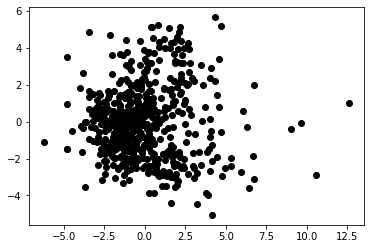

In [86]:
plt.scatter(lens[:,0],lens[:,1],c='black')


In [92]:
positions

,Pos
0,5
1,5
2,5
3,2
4,4
...,...
533,4
534,1
535,5
536,5


In [61]:
positions['Pos']=np.where(positions['Pos']=='C',5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='PF',4,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='SF',3,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='SG',2,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='PG',1,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='C-PF',4.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='PF-C',4.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='PF-SF',3.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='SG-SF',2.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='PG-SG',1.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='SF-PF',3.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='SF-SG',2.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='SG-PG',1.5,positions['Pos'])

In [28]:
lens[135]

array([-4.67209609,  5.04132585])

In [35]:
list(tooltips).index('2005Phoenix Suns*')

487

In [36]:
lens[487]

array([-0.56594674, -3.02643434])

In [37]:
list(tooltips).index('2007Phoenix Suns*')

489

In [38]:
list(tooltips).index('2010Phoenix Suns*')

491

In [39]:
list(tooltips).index('2010Dallas Mavericks*')

125

In [40]:
list(tooltips).index('2014San Antonio Spurs*')

551

In [41]:
lens[491]

array([ 0.03361873, -2.68657989])

In [42]:
lens[125]

array([ 0.13124759, -2.7785807 ])

In [43]:
lens[551]

array([ 1.34301644, -2.69153331])

In [44]:
lens[489]

array([ 1.0472522 , -3.58719377])

In [49]:
list(tooltips).index('2006Phoenix Suns*')

488

In [50]:
list(tooltips).index('2008Phoenix Suns*')

490

In [51]:
list(tooltips).index('2015Golden State Warriors*')

191

In [14]:
Grouptwo=[list(tooltips).index('2010Cleveland Cavaliers*'),
list(tooltips).index('2014Golden State Warriors*'),
list(tooltips).index('2015Indiana Pacers'),
list(tooltips).index('2017Miami Heat'),
list(tooltips).index('2008Orlando Magic*'),
list(tooltips).index('2009Orlando Magic*'),
list(tooltips).index('2010Orlando Magic*'),
list(tooltips).index('2008San Antonio Spurs*'),
list(tooltips).index('2009San Antonio Spurs*'),
list(tooltips).index('2010San Antonio Spurs*'),
list(tooltips).index('2011San Antonio Spurs*'),
list(tooltips).index('2012San Antonio Spurs*'),
list(tooltips).index('2013San Antonio Spurs*'),
list(tooltips).index('2014San Antonio Spurs*'),
list(tooltips).index('2015San Antonio Spurs*'),
list(tooltips).index('2017Utah Jazz*')]

In [15]:
Groupthree=[list(tooltips).index('2005Miami Heat*'),
list(tooltips).index('2006Miami Heat*'),
list(tooltips).index('2011Miami Heat*'),
list(tooltips).index('2009Orlando Magic*'),
list(tooltips).index('2011Orlando Magic*')]

In [16]:
Groupfour=[list(tooltips).index('2013Los Angeles Lakers*'),
           list(tooltips).index('2006Miami Heat*'),
           list(tooltips).index('2007Miami Heat*'),
           list(tooltips).index('2011Orlando Magic*'),
           list(tooltips).index('2012Orlando Magic*')]

In [73]:
projection

NameError: name 'projection' is not defined

In [74]:
projection=PCA(n_components=2)
projection.fit(data)

PCA(n_components=2)

In [76]:
projection.components_

array([[ 0.12262798,  0.33459947,  0.15162245,  0.05747756,  0.31346389,
         0.22870916,  0.35245397,  0.31979334, -0.32718504,  0.0427709 ,
         0.11386313, -0.24179428,  0.38024479, -0.26729541,  0.01549104,
         0.14428727, -0.22858927],
       [-0.45904379, -0.11195382, -0.24993817,  0.33651586,  0.29475206,
         0.12565867,  0.15471817, -0.06317698,  0.08482293, -0.03464601,
        -0.00749393,  0.23201532,  0.03152328,  0.05539296,  0.42372391,
         0.45897995,  0.11783896]])

In [27]:
df.loc[Groupone]

,3P%,2P%,FT%,Opp 3P%,Opp 2P%,Opp FT%,Pace,DRB%,ORB%,AST%,BLK%,TOV%,3par,Ftr,OppAST%,OppBLK%,OppTOV%
487,1.990412,0.738192,-0.423950,-1.443315,-0.729762,-1.096042,0.498679,-2.202680,0.573848,-0.327433,-0.359678,-0.828214,0.306698,0.255172,-1.940603,-0.980542,-1.154354
489,2.308020,1.462975,1.596188,0.449762,-0.428165,0.467054,0.428915,-0.869561,-0.918117,0.981617,-0.837009,0.101599,0.282274,-0.519468,-3.290332,-1.510043,0.169285
461,-2.985448,-1.399918,0.619788,-1.713754,-1.521456,-0.620317,-1.277467,-0.810957,1.907060,-0.094776,-0.762219,1.171318,-1.825642,1.047205,1.500794,-0.016514,0.768967
125,0.878783,-0.022830,1.865540,-0.631996,-0.126568,-0.144593,-0.364767,-0.219812,-0.415047,0.577774,0.363485,-0.987036,-0.498830,-0.257283,-1.616573,-1.353378,0.188730
551,2.202150,0.919388,0.821802,-0.226337,-0.842861,-0.008671,0.261812,0.744744,-0.941590,0.834491,-0.259748,0.141023,-0.077104,-1.209605,-1.463010,-0.480087,-0.469567
490,1.990412,1.680410,0.754464,-0.226337,-0.465865,-0.756239,0.684000,-1.242536,-1.032874,1.459502,0.414692,0.074817,-0.036532,0.128733,-3.318340,-1.525974,-1.323326
488,2.308020,0.701953,1.528850,0.449762,-0.541264,-1.979531,0.475491,-0.825865,-1.104358,1.210074,-0.613713,-1.042578,0.353583,-2.094601,-3.330880,-2.056615,-0.081941
191,2.255085,0.810670,0.249430,-1.308095,-1.257558,0.195211,1.092251,0.066042,-0.499014,1.821774,0.990880,-0.257092,0.570232,-1.221586,-0.632552,-1.728362,0.834150
